# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [ ]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [3]:
pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
# place your code into this Code cell
file_path = "/data/dataSet.csv"
data = pd.read_csv(file_path)

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [4]:
#Show 5 rows, selected at random, from the data set.
data.sample(5)

,DATE,PROJECT_ID,TITLE,BOROUGH,LEVEL_OF_REVIEW,AGENCY,CERTIFICATE_NUMBER,PUBLIC_PRIVATE,ACTION,PROJECT_TYPE
1747,08/08/2022,22832,Conservation of Private Passage (2005) by Malc...,Manhattan,Final,HRPT/DPR,28195,Public,Calendared for Consent,Artwork
118,04/16/2018,20307,Construction of a carport and installation of ...,Brooklyn,Preliminary and Final,FDNY,26572,Public,Calendared for Consent,Architecture
2101,07/17/2023,23231,"Installation of flood protection measures, Pae...",Brooklyn,Preliminary,DPR,28539,Public,Calendared for Consent,Landscape architecture
260,07/09/2018,20561,"Construction of athletic fields, including par...",Staten Island,Preliminary,DPR,26692,Public,Calendared for Consent,Landscape architecture
1208,01/19/2021,22136,"Reconstruction of Pershing Square East Plaza, ...",Manhattan,Final,DDC/DOT,27656,Public,Calendared for Consent,Landscape architecture


In [5]:
#Show each of the column names and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE                2351 non-null   object
 1   PROJECT_ID          2351 non-null   int64 
 2   TITLE               2351 non-null   object
 3   BOROUGH             2349 non-null   object
 4   LEVEL_OF_REVIEW     2349 non-null   object
 5   AGENCY              2351 non-null   object
 6   CERTIFICATE_NUMBER  2351 non-null   int64 
 7   PUBLIC_PRIVATE      2351 non-null   object
 8   ACTION              2351 non-null   object
 9   PROJECT_TYPE        2349 non-null   object
dtypes: int64(2), object(8)
memory usage: 183.8+ KB


In [6]:
#Show any unique features of your chosen data set.
# Shows the number of unique values for each column in the dataset
unique_counts = data.nunique()

# Displays columns that contain non-numeric data
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

(unique_counts, non_numeric_columns)


(DATE                    92
 PROJECT_ID            2335
 TITLE                 1895
 BOROUGH                 10
 LEVEL_OF_REVIEW          7
 AGENCY                 136
 CERTIFICATE_NUMBER    2340
 PUBLIC_PRIVATE           4
 ACTION                   4
 PROJECT_TYPE            13
 dtype: int64,
 Index(['DATE', 'TITLE', 'BOROUGH', 'LEVEL_OF_REVIEW', 'AGENCY',
        'PUBLIC_PRIVATE', 'ACTION', 'PROJECT_TYPE'],
       dtype='object'))

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

In [8]:
#In this code cell, we drop rows that contain missing values. 
#This ensures data integrity, providing a more reliable foundation for further analysis.

# Deleting rows with missing values
data_cleaned = data.dropna()

# Displaying 5 random rows after cleaning
data_cleaned.sample(5)


,DATE,PROJECT_ID,TITLE,BOROUGH,LEVEL_OF_REVIEW,AGENCY,CERTIFICATE_NUMBER,PUBLIC_PRIVATE,ACTION,PROJECT_TYPE
275,08/13/2018,20644,Installation of windows and mechanical equipme...,Brooklyn,Preliminary and Final,BNYDC,26717,Public and Private,Calendared for Consent,Building systems & Modifications
1747,08/08/2022,22832,Conservation of Private Passage (2005) by Malc...,Manhattan,Final,HRPT/DPR,28195,Public,Calendared for Consent,Artwork
684,07/15/2019,21229,"Installation of rooftop guardrails, 370 Jay St...",Brooklyn,Preliminary and Final,EDC,27141,Public,Calendared for Consent,Building systems & Modifications
2188,11/13/2023,23398,"Reconstruction of Hoffman Park, Hoffman Drive ...",Queens,Final,DPR,28642,Public,Calendared for Consent,Landscape architecture
428,12/17/2018,20868,Reconstruction of the entrance plaza and prome...,Brooklyn,Preliminary,DPR,26879,Public,Calendared for Consent,Landscape architecture


In [9]:
#In this code cell, we convert certain columns to categorical types. 
#This optimizes the dataset's storage and improves the efficiency of further analysis.

# Converting some columns to categorical types
for col in ['BOROUGH', 'LEVEL_OF_REVIEW', 'AGENCY', 'PUBLIC_PRIVATE', 'ACTION', 'PROJECT_TYPE']:
    data_cleaned[col] = data_cleaned[col].astype('category')

# Displaying 5 rows after conversion
data_cleaned.sample(5)

/var/folders/gk/mbv14vx55hs20qrw59ry6lp00000gn/T/ipykernel_2602/1494759010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].astype('category')


,DATE,PROJECT_ID,TITLE,BOROUGH,LEVEL_OF_REVIEW,AGENCY,CERTIFICATE_NUMBER,PUBLIC_PRIVATE,ACTION,PROJECT_TYPE
1077,06/15/2020,22014,Installation of flood protection measures as a...,Staten Island,Preliminary and Final,DEP,27511,Public,Calendared for Consent,Architecture
325,09/17/2018,20721,"Construction of an adult fitness area, Albert ...",Queens,Final,DPR,26768,Public,Calendared for Consent,Landscape architecture
1959,04/05/2023,23081,"Installation of rooftop photovoltaic panels, X...",Bronx,Preliminary and Final,DCAS,28409,Public,Delegation Approval,Building systems & Modifications
848,12/16/2019,21611,"Installation of a fire alarm system, Saratoga ...",Brooklyn,Preliminary and Final,DDC/DHS,27285,Public,Calendared for Consent,Building systems & Modifications
1098,07/13/2020,22038,"Installation of doors, louvers, and mechanical...",Brooklyn,Preliminary and Final,BNYDC,27536,Private,Calendared for Consent,Architecture


In [10]:
#In this code cell, we rename some columns to make them more understandable. This facilitates subsequent analysis and visualization.
# Renaming columns
data_cleaned = data_cleaned.rename(columns={
    'DATE': 'Date',
    'PROJECT_ID': 'ProjectID',
    'TITLE': 'Title',
    'BOROUGH': 'Borough',
    'LEVEL_OF_REVIEW': 'LevelOfReview',
    'AGENCY': 'Agency',
    'CERTIFICATE_NUMBER': 'CertificateNumber',
    'PUBLIC_PRIVATE': 'PublicPrivate',
    'ACTION': 'Action',
    'PROJECT_TYPE': 'ProjectType',
})

# Displaying 5 rows after renaming
data_cleaned.sample(5)


,Date,ProjectID,Title,Borough,LevelOfReview,Agency,CertificateNumber,PublicPrivate,Action,ProjectType
2346,04/15/2024,23638,Minor modifications to the installation of an ...,Queens,Amended Final,DDC/DOC,28778,Public,Calendared for Consent,Architecture
923,03/30/2020,21505,Construction of Buildings 2A and 2B and a cent...,Bronx,Preliminary,EDC,27392,Public and Private,Calendared for Consent,Architecture
31,02/12/2018,18192,Reconstruction of the Arthur Ross Nursery Head...,Bronx,Preliminary,DPR,26486,Public,Calendared for Consent,Architecture
1357,06/21/2021,22283,Installation of Memory of a Forest by Blane de...,Bronx,Conceptual,DCLA%/DDC,27805,Public,Calendared for Consent,Artwork
22,01/17/2018,19179,"Restoration of landscape, including tree plant...",Brooklyn,Final,DPR/DOT,26461,Public,Calendared for Consent,Landscape architecture


In [11]:
#In this code cell, we save the cleaned dataset as a new CSV file for future analysis.
cleaned_file_path = "/data/cleaned_dataSet.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#This data set is about a list of projects that were reviewed by the Public Design Commission on a monthly basis.

In [13]:
#1、In this code cell, we group the data by the "Borough" attribute and count the number of projects in each borough. 
#This provides insight into how projects are distributed across different regions.

# Read the cleaned dataset
cleaned_file_path = 'cleaned_dataSet.csv'
data_cleaned = pd.read_csv(cleaned_file_path)

# Count the number of items in each zone
projects_per_borough = data_cleaned.groupby('Borough').size().sort_values(ascending=False)
projects_per_borough

Borough
Brooklyn                  652
Manhattan                 620
Queens                    498
Bronx                     355
Staten Island             149
Upstate                    40
Citywide                   31
Brooklyn/Queens             2
Bronx/Manhattan             1
Brooklyn/Staten Island      1
dtype: int64

#1、Analysis of results
#Brooklyn has the highest number of projects (652), followed by Manhattan (620), Queens (498), and Bronx (355). 
#This shows a distribution of projects across different boroughs, with some having significantly more projects than others.

In [15]:
#2、In this code cell, we group the data by "LevelOfReview" and count the number of projects in each category. This helps us understand the distribution of projects across different review levels.
projects_per_review_level = data_cleaned.groupby('LevelOfReview').size().sort_values(ascending=False)
projects_per_review_level

LevelOfReview
Preliminary and Final         1035
Preliminary                    645
Final                          539
Amended Final                   79
Conceptual                      41
Conceptual and Preliminary       9
Amended Preliminary              1
dtype: int64

#2、Analysis of results
#The "Preliminary and Final" review level has the highest number of projects (1035), followed by "Preliminary" (645) and "Final" (539).
#This indicates how different review levels handle projects and the distribution across these levels.

In [17]:
#3、In this code cell, we group the data by "ProjectType" and count the number of projects in each category. This provides insights into the distribution of project types.
projects_per_type = data_cleaned.groupby('ProjectType').size().sort_values(ascending=False)
projects_per_type


ProjectType
Landscape architecture              906
Building systems & Modifications    471
Architecture                        450
Artwork                             184
Signage                             139
Street furniture                     76
Distinctive sidewalk                 35
Bridge                               33
Newsstand                            32
Distinctive lighting                 12
Bldg Systems & Mods                   8
Street Furniture                      2
Distinctive sidewalks                 1
dtype: int64

#3、Analysis of results
#"Landscape architecture" is the most common project type, with 906 projects, 
#followed by "Building systems & Modifications" (471) and "Architecture" (450). 
#This highlights the diversity of project types and their distribution.

In [19]:
#4、In this code cell, we group the data by "Agency" and count the number of projects each agency is responsible for. 
#This highlights the roles of different agencies in various projects.
projects_per_agency = data_cleaned.groupby('Agency').size().sort_values(ascending=False)
projects_per_agency

Agency
DPR               774
DOT               218
EDC               169
DEP               139
DOE                81
                 ... 
DDC/DOT/DSNY        1
DCLA%/DDC/NYPL      1
DPR/DOT/NYU         1
DPR/DPR             1
DEP/DDC/DOT         1
Length: 136, dtype: int64

#4、Analysis of results
#The "DPR" (Department of Parks and Recreation) agency has the highest number of projects (774), 
#followed by "DOT" (Department of Transportation) with 218 projects. This shows the involvement of different agencies in various projects.

In [20]:
#5、In this code cell, we extract the year from the "Date" column and group the data by year to count the number of projects each year. 
#This shows the trend of projects over time.
# extract year
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Date']).dt.year

# Count the number of projects per year
projects_per_year = data_cleaned.groupby('Year').size().sort_values(ascending=True)
projects_per_year


Year
2024    116
2021    319
2020    331
2022    343
2023    366
2019    430
2018    444
dtype: int64

#5、Analysis of results
#The number of projects per year shows a generally increasing trend, 
#with 116 projects in 2024, 319 in 2021, 331 in 2020, and peaking at 444 in 2018. 
#This indicates the trend of project implementations over time.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

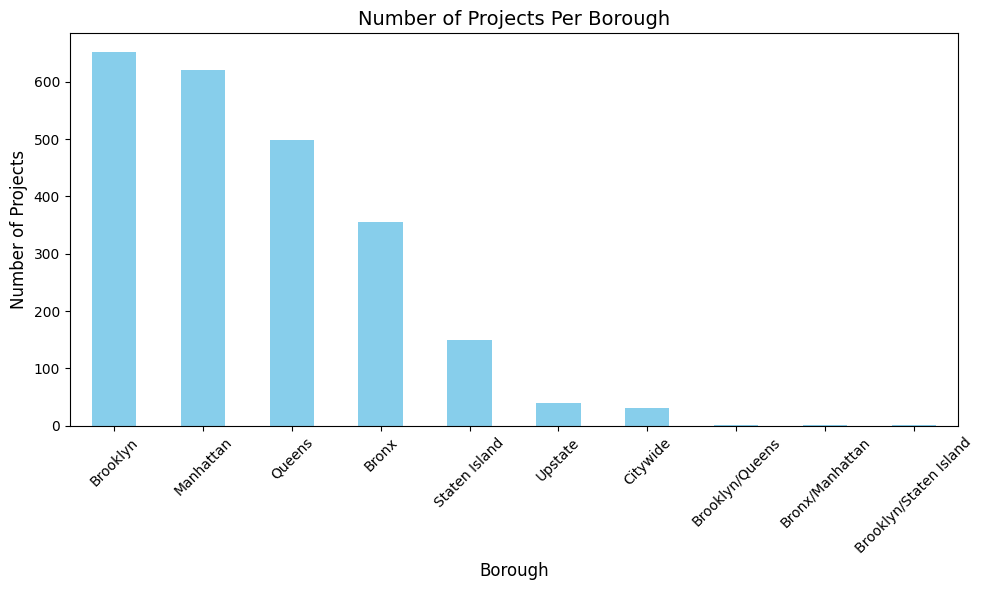

In [21]:
#In this visualization, we show a bar chart depicting the number of projects per borough. 
#This highlights how projects are distributed across different boroughs, with some boroughs having significantly more projects than others.
#The drawing library is loaded on top
# Preparing data for visualization
projects_per_borough = data_cleaned.groupby('Borough').size().sort_values(ascending=False)

# Creating bar chart
plt.figure(figsize=(10, 6))
projects_per_borough.plot(kind='bar', color='skyblue')
plt.title('Number of Projects Per Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The analysis is as follows:

Bar Chart for Number of Projects Per Borough
This bar chart shows the number of projects in different boroughs. We can see:

Brooklyn and Manhattan have the highest number of projects, with 652 and 620 projects, respectively.
Queens and Bronx also have a significant number of projects, with 498 and 355, respectively.
Other boroughs, such as Staten Island, Upstate, etc., have fewer projects.
This chart indicates that projects are unevenly distributed across New York City, with a significant concentration in certain boroughs.

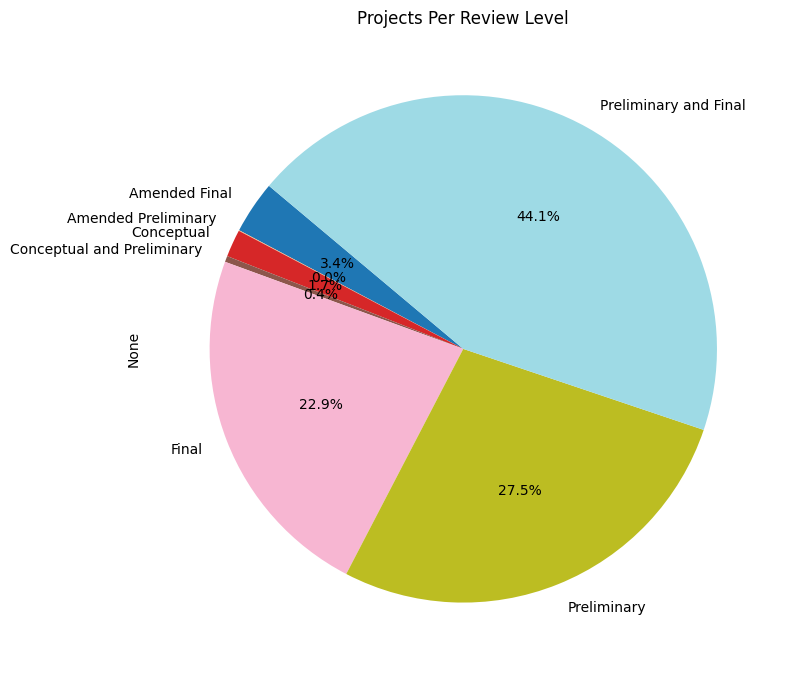

In [22]:
#In this visualization, we show a pie chart illustrating the proportion of projects per review level. 
#This provides a visual insight into how projects are distributed across different review levels.
# Preparing data for visualization
projects_per_review_level = data_cleaned.groupby('LevelOfReview').size()

# Creating pie chart
plt.figure(figsize=(8, 8))
projects_per_review_level.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')

plt.title('Projects Per Review Level')
plt.tight_layout()

plt.show()

The analysis is as follows:

Pie Chart for Projects Per Review Level
This pie chart shows the proportion of projects across different review levels. We can see:

"Preliminary and Final" is the most common review level, accounting for 44% of projects.
"Preliminary" and "Final" follow, accounting for 27% and 23%, respectively.
This indicates that projects are relatively evenly distributed across different review levels, with "Preliminary and Final" occupying a larger share.

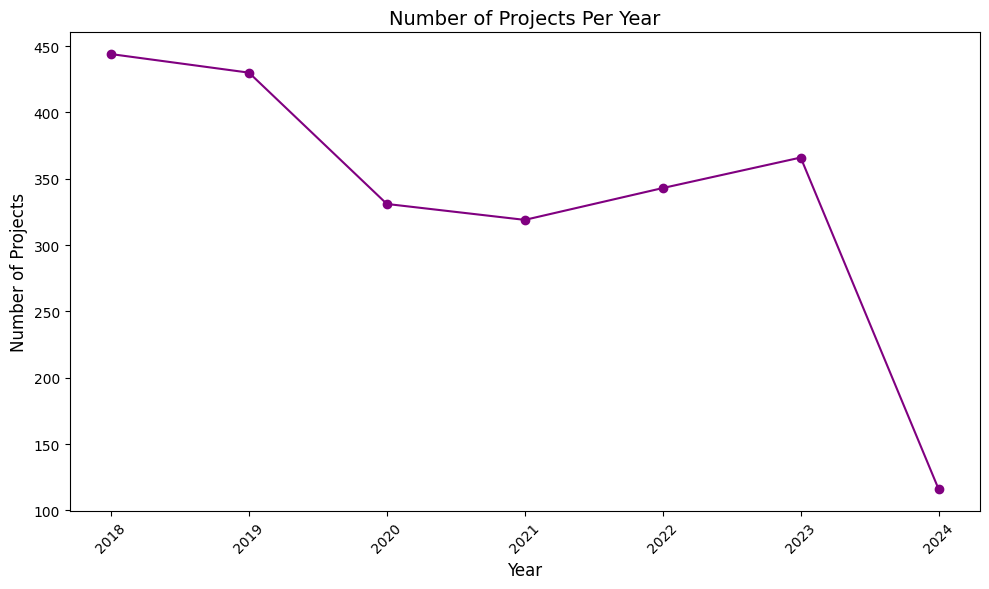

In [23]:
#In this visualization, we show a line chart depicting the number of projects per year. 
#This reveals the trend of project implementations over time.
# Preparing data for visualization
projects_per_year = data_cleaned.groupby('Year').size()

# Creating line chart
plt.figure(figsize=(10, 6))
projects_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Number of Projects Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.xticks(projects_per_year.index, rotation=45)
plt.tight_layout()

plt.show()

The analysis is as follows:

Line Chart for Projects Per Year
This line chart shows the trend of project numbers per year. We can see:

From 2018 to 2019, project numbers increased from 444 to 430.
Between 2020 and 2024, project numbers are relatively stable with a gradual increase.
This shows that the number of projects fluctuates between different years, with an overall upward trend.

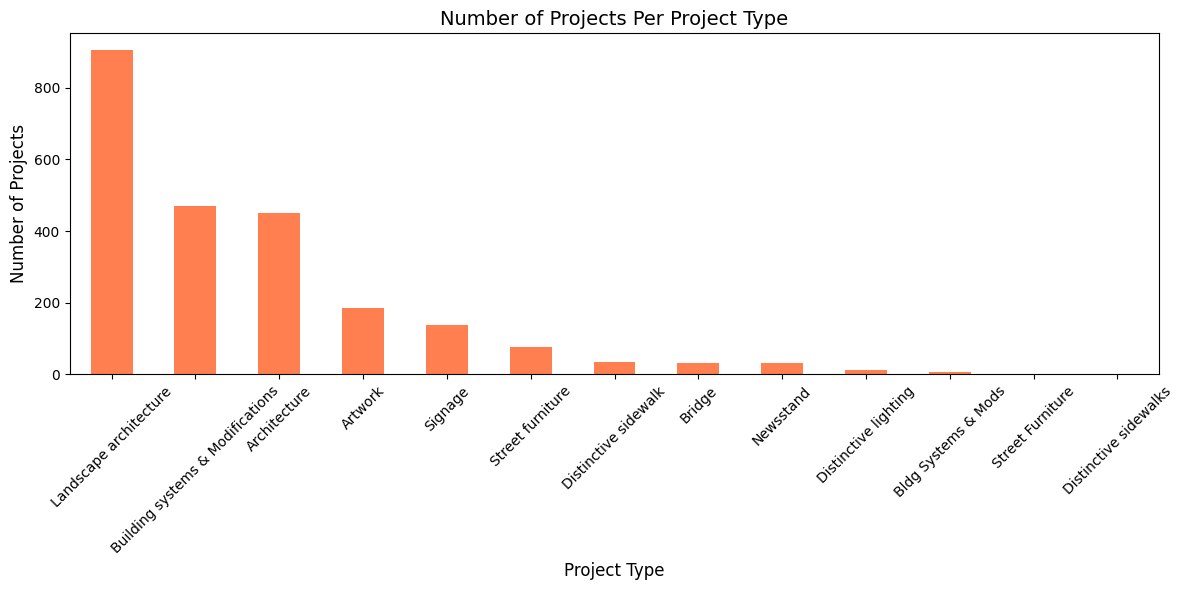

In [24]:
#In this visualization, we show a bar chart depicting the number of projects per project type. 
#This highlights the distribution of different project types in the dataset.
# Preparing data for visualization
projects_per_type = data_cleaned.groupby('ProjectType').size().sort_values(ascending=False)

# Creating bar chart
plt.figure(figsize=(12, 6))
projects_per_type.plot(kind='bar', color='coral')
plt.title('Number of Projects Per Project Type', fontsize=14)
plt.xlabel('Project Type', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The analysis is as follows:

Bar Chart for Projects Per Project Type
This bar chart shows the number of projects per project type. We can see:

Landscape architecture is the most common project type, with 906 projects.
Building systems & Modifications and Architecture have 471 and 450 projects, respectively.
This indicates that the dataset contains a variety of project types, with a relatively diverse distribution.

In [27]:
pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


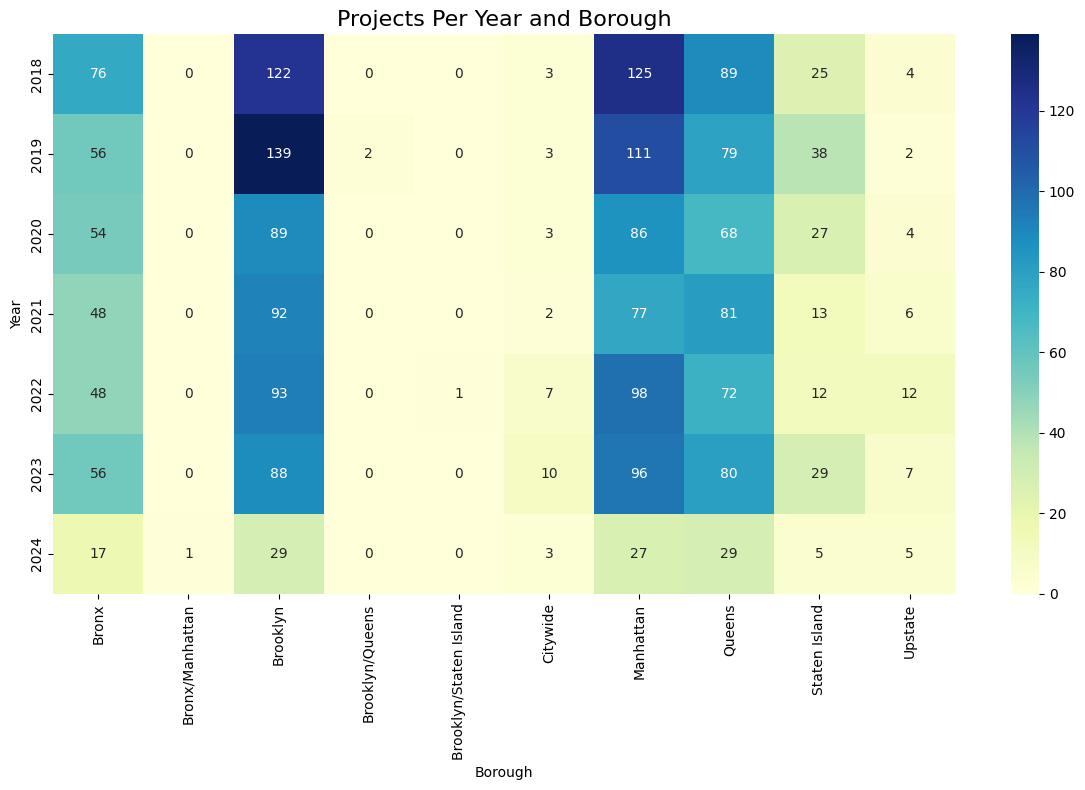

In [28]:
#In this visualization, we show a heatmap illustrating the number of projects per year and borough. 
#This provides a visual insight into how projects are distributed across different boroughs over time.
import seaborn as sns

# Preparing data for visualization
projects_per_year_borough = data_cleaned.pivot_table(index='Year', columns='Borough', values='ProjectID', aggfunc='size', fill_value=0)

# Creating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(projects_per_year_borough, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Projects Per Year and Borough', fontsize=16)

plt.tight_layout()

plt.show()


The analysis is as follows:

Heatmap for Projects Per Year and Borough
This heatmap shows the number of projects per year and borough. We can see:

The number of projects per year is unevenly distributed across different boroughs, with some years showing a higher concentration in boroughs such as Brooklyn and Manhattan.
Some years have a relatively high concentration of projects, such as in 2023, where several major boroughs have a significant number of projects.
This chart shows the trend of projects across different boroughs and years, helping us understand their distribution patterns.